In [1]:
import sklearn
import gensim
import glob
import os
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

In [2]:
g = glob.glob(os.path.join(r'D:\emailpz\HTML-emails\HTML','*html'))

In [3]:
# lemmatizer = WordNetLemmatizer()
# for k in g: 
#     f = open(k, 'r', encoding='utf-16-le', errors='ignore')
#     html_text = f.read()
#     #Preprocessing Start
#     stripped_text = re.sub('<[^>]*>', '', html_text)
#     stripped_text= re.sub(r"http\S+", "",html_text )
#     soup = BeautifulSoup(stripped_text, 'lxml')
#     text = soup.get_text()
#     text = re.sub("\S*\d\S*", "", text).strip()
#     text = re.sub('[^A-Za-z0-9]+', ' ', text)
#     text = re.sub('&nbsp;', ' ', text)
#     text = re.sub('&lt;', '', text)
#     text = re.sub('&gt;', '', text)
#     text = re.sub('&#128227;', '', text)
#     s = text.encode('ascii',errors='ignore').decode()
#     ss = s.split('\n')
#     #Preprocessing end
#     tk = [word_tokenize(word) for word in ss] #Tokenization
#     stop_words = set(stopwords.words('english'))
#     stop = [w for w in tk[0] if not w.lower() in stop_words] #Removal of stopwords
#     sss =[lemmatizer.lemmatize(word) for word in stop] #lemmatization
#     final_text = ' '.join(sss)
#     #Writing to files
#     with open(os.path.join(r'C:\Users\SSD\Desktop\html\HTML-emails\sri1\sri',k.split('\\')[-1][:-5]+'.txt'),'w') as t:
#         t.writelines(final_text)
#         t.close()

In [4]:
# def key_words(keys, model, words=10):
#     keys = []
#     for x in model.components_:
#         locations = (x).argsort()[-1*words:][::-1]
#         kws = keys.take(locations)
#         topkeys.append(kws)
#     return keys

In [5]:
#--
def GetTextFiles(files_path):
    return sklearn.datasets.load_files(files_path)    

tmp = GetTextFiles(r'D:\emailpz\HTML-emails\sri1')

In [6]:
act=[str(x) for x in tmp.data if x!=b'' ]
len(act)

1092

In [7]:
txt_rows=pd.DataFrame (act, columns = ['text'])
txt_rows.head(5)

text
0  b'CRISPR show stressed Abigail BioTechniques e...
1  b'Use CAUTION opening link attachment Applicat...
2  b'Roche Sequencing Life Science newsletter lab...
3  b'Ryan Remington rremington elementalmachines ...
4  b'Use CAUTION opening link attachment Check up...

In [8]:
#--
txt=txt_rows['text']
txt.head(5)

0    b'CRISPR show stressed Abigail BioTechniques e...
1    b'Use CAUTION opening link attachment Applicat...
2    b'Roche Sequencing Life Science newsletter lab...
3    b'Ryan Remington rremington elementalmachines ...
4    b'Use CAUTION opening link attachment Check up...
Name: text, dtype: object

In [9]:
# Bag of words representation
token_counts = CountVectorizer()
bow =  token_counts.fit_transform(txt)
bow

<1092x15910 sparse matrix of type '<class 'numpy.int64'>'
	with 155857 stored elements in Compressed Sparse Row format>

In [10]:
token_counts.vocabulary_.items()

dict_items([('crispr', 3345), ('show', 13011), ('stressed', 13708), ('abigail', 38), ('biotechniques', 1651), ('editor', 4485), ('com', 2791), ('sent', 12812), ('friday', 5668), ('april', 846), ('pm', 10898), ('hnatyshyn', 6613), ('serhiy', 12845), ('subject', 13761), ('use', 15067), ('caution', 2217), ('opening', 10068), ('link', 8309), ('attachment', 1057), ('versitility', 15210), ('different', 3995), ('aspect', 971), ('medicine', 8867), ('accurate', 129), ('gene', 5849), ('editing', 4483), ('therapeutic', 14263), ('application', 817), ('brain', 1825), ('disorder', 4133), ('tech', 14129), ('newsletter', 9706), ('peek', 10510), ('behind', 1377), ('paper', 10355), ('pooled', 10991), ('screen', 12670), ('imaging', 6952), ('microraft', 9068), ('array', 908), ('reveals', 12217), ('stress', 13707), ('granule', 6092), ('regulatory', 11938), ('factor', 5207), ('work', 15661), ('author', 1123), ('developed', 3919), ('easy', 4439), ('workflow', 15669), ('combine', 2798), ('high', 6545), ('cont

In [11]:
bow_weights = [(word, bow.getcol(idx).sum()) for word, idx in token_counts.vocabulary_.items()]

In [12]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(bow_weights))

(-0.5, 1499.5, 1199.5, -0.5)

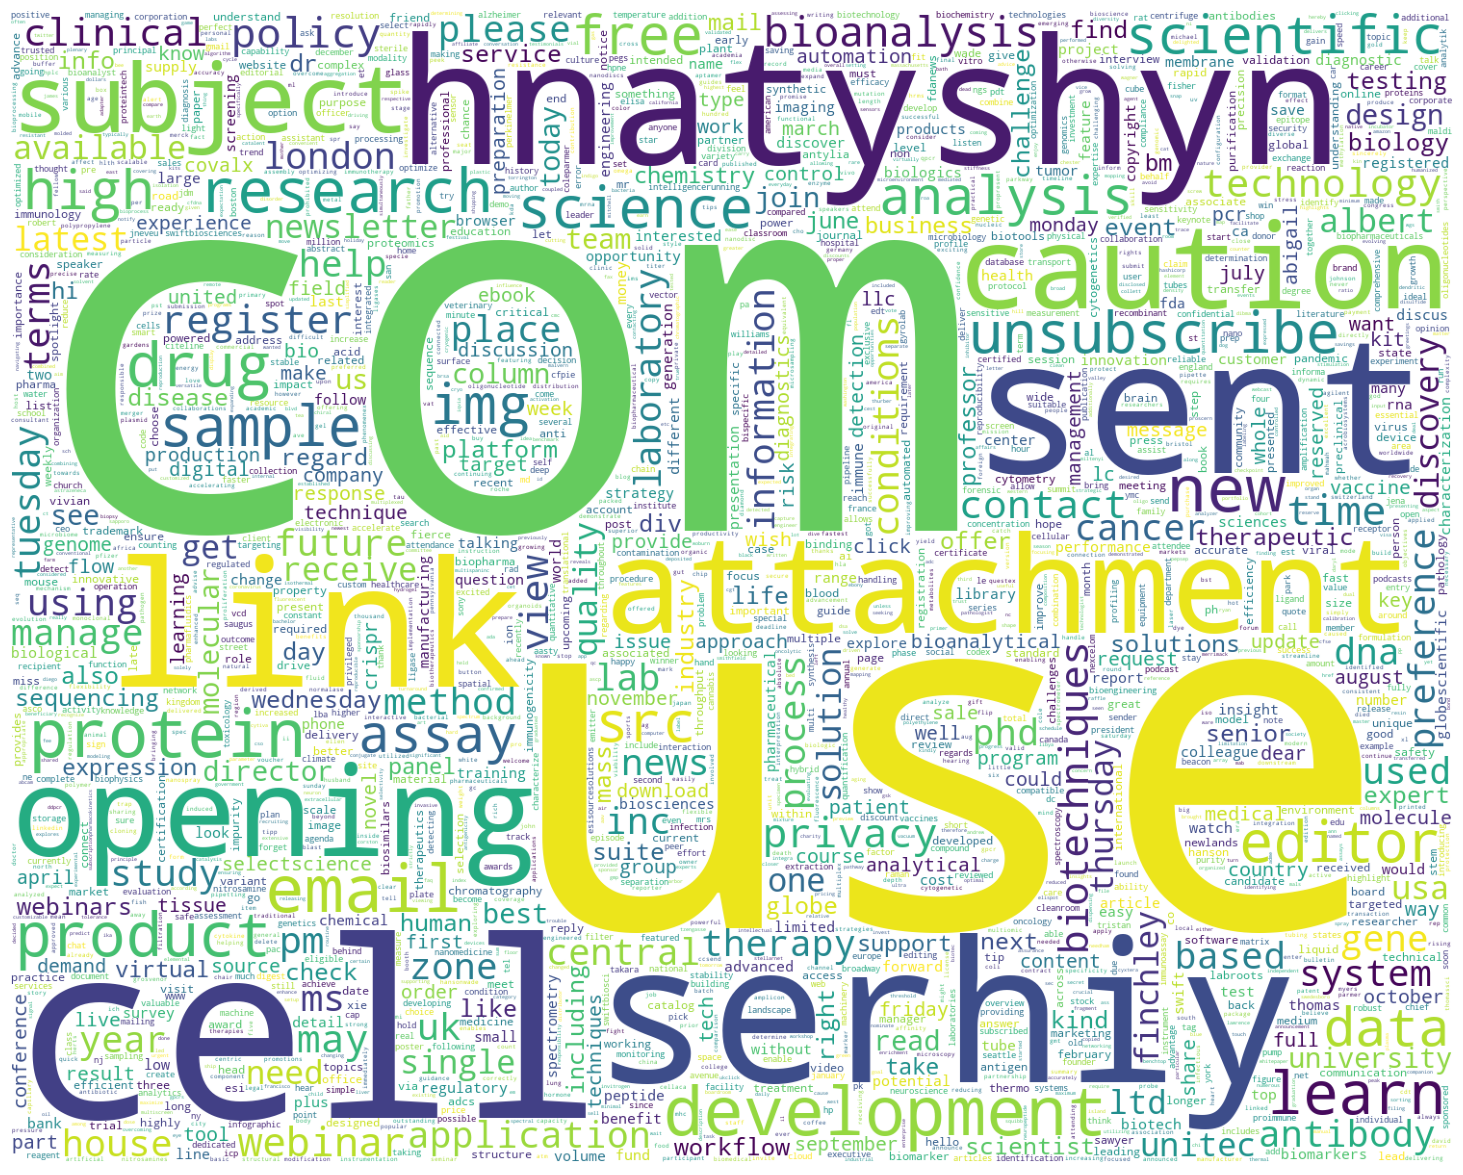

In [13]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')

In [14]:
# Component Analysis
pca_bow = PCA(n_components=500).fit_transform(bow.toarray())# 0.95 represents 95% of data

In [15]:
pca_bow.shape

(1092, 500)

In [16]:
# Clustering using KMEANS
kmeans = KMeans(n_clusters=10).fit(pca_bow)

In [17]:
bow_transformed=kmeans.transform(pca_bow)

In [18]:
bow_labels = kmeans.predict(pca_bow)

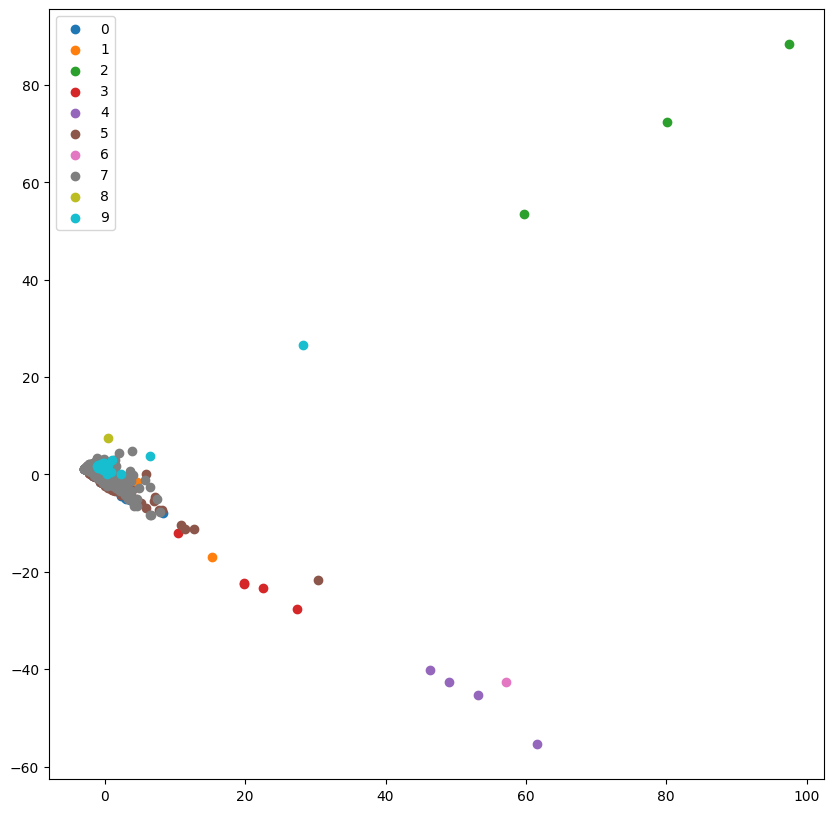

In [19]:
u_labels = np.unique(bow_labels)
plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(pca_bow[bow_labels == i , 0] , pca_bow[bow_labels == i , 1] , label = i)
plt.legend()
plt.show()

In [20]:
clusters = ['Cluster_no '+str(x) for x in range(10)]
indexs=[]
for x in range(txt.shape[0]):
    indexs.append('Doc_no '+str(x))
    
tabulated_data = pd.DataFrame(np.round(bow_transformed,2) ,columns = clusters, index = indexs)
tabulated_data['Cluster'] = np.argmax(tabulated_data.values,axis=1)

In [21]:
tabulated_data

Cluster_no 0  Cluster_no 1  Cluster_no 2  Cluster_no 3  \
Doc_no 0            20.75         26.51        109.40         56.77   
Doc_no 1            32.24         19.90        111.68         59.33   
Doc_no 2            25.67         29.43        110.19         59.41   
Doc_no 3            13.38         19.68        108.06         56.08   
Doc_no 4            25.46         16.54        110.39         57.62   
...                   ...           ...           ...           ...   
Doc_no 1087         20.75         28.04        109.43         52.69   
Doc_no 1088         20.03         24.41        108.57         57.42   
Doc_no 1089         39.02         41.69        108.10         65.87   
Doc_no 1090         20.38         24.61        109.68         58.08   
Doc_no 1091         12.68         19.45        108.45         56.04   

             Cluster_no 4  Cluster_no 5  Cluster_no 6  Cluster_no 7  \
Doc_no 0            80.80         18.85        101.52         20.55   
Doc_no 1            78.59         32.13        101.25         31.25   
Doc_no 2            81.50         24.78        102.54         23.98   
Doc_no 3            79.31         13.07        101.07          9.55   
Doc_no 4            81.17         25.91        101.79         24.30   
...                   ...           ...           ...           ...   
Doc_no 1087         78.57         20.90         98.86         22.31   
Doc_no 1088         80.46         19.98        101.82         17.84   
Doc_no 1089         86.44         38.99        105.84         37.87   
Doc_no 1090         81.49         20.27        102.51         17.99   
Doc_no 1091         79.55         12.32        101.24          8.69   

             Cluster_no 8  Cluster_no 9  Cluster  
Doc_no 0           140.71         24.85        8  
Doc_no 1           140.74         34.49        8  
Doc_no 2           140.37         28.05        8  
Doc_no 3           137.69         16.80        8  
Doc_no 4           139.34         27.74        8  
...                   ...           ...      ...  
Doc_no 1087        139.14         26.36        8  
Doc_no 1088        139.48         22.00        8  
Doc_no 1089        144.21         38.26        8  
Doc_no 1090        139.27         22.73        8  
Doc_no 1091        139.43         16.60        8  

[1092 rows x 11 columns]

In [22]:
#--
clusters=tabulated_data['Cluster'].values.tolist()
tabulated_data['Cluster'].value_counts()

8    1091
2       1
Name: Cluster, dtype: int64

In [23]:
# Topic Modelling--
matrix_token_counts = CountVectorizer() 
ldab= matrix_token_counts.fit_transform(txt)
lda_model = LatentDirichletAllocation(n_components=10)             
X_topics = lda_model.fit_transform(ldab)
topic_summaries_data = []
topic_word = lda_model.components_ 
vocab = matrix_token_counts.get_feature_names()

def topic_ds(x, td):
    topic_words = np.array(vocab)[np.argsort(td)][:-(20+1):-1]
    topic_summaries_data.append(' '.join(topic_words))
    print(f'topic {x}: {" ".join(topic_words)}')

d=[topic_ds(x, td) for x, td in enumerate(topic_word)]
    

topic 0: use com sent sample serhiy link attachment opening analysis caution subject hnatyshyn new need product ymc icp information protein exchange
topic 1: com email selectscience please use sent subject sale link may attachment caution opening fund bank business country money free account
topic 2: scientific protein globe com phd globescientific mail expression laboratory production inc tube sent cell serhiy hnatyshyn product research free supply
topic 3: com use serhiy email sent new hnatyshyn time laboratory clinical experience process cell link high attachment subject opening product caution
topic 4: bioanalysis development zone cell ms editor drug serhiy therapy assay gene use com mass link webinar uk bioanalytical policy privacy
topic 5: protein cell register drug serhiy virtual product hnatyshyn com course biotech sent university dr phd event development email antibody use
topic 6: biotechniques editor science news serhiy cell data abigail techniques talking new future use com

In [24]:
#--
topics=[]
for x in range(lda_model.n_components):
    topics.append("topic "+str(x))
    
indexs=[]
for x in range(txt.shape[0]):
    indexs.append("doc "+str(x))
    
document_topic = pd.DataFrame(np.round(X_topics, 2), columns=topics, index=indexs)
topic = np.argmax(document_topic.values, axis=1)
document_topic['max_topic'] = topic
document_topic

topic 0  topic 1  topic 2  topic 3  topic 4  topic 5  topic 6  \
doc 0        0.00     0.00     0.00     0.00     0.00     0.00     0.52   
doc 1        0.00     0.00     0.00     0.00     1.00     0.00     0.00   
doc 2        0.00     0.00     0.00     0.00     0.00     0.00     0.00   
doc 3        0.07     0.15     0.00     0.37     0.00     0.25     0.17   
doc 4        0.00     0.00     0.00     0.00     0.73     0.27     0.00   
...           ...      ...      ...      ...      ...      ...      ...   
doc 1087     0.00     0.00     0.00     0.00     0.75     0.00     0.00   
doc 1088     0.00     0.00     0.36     0.48     0.00     0.00     0.00   
doc 1089     0.00     0.00     0.00     0.33     0.00     0.34     0.33   
doc 1090     0.00     1.00     0.00     0.00     0.00     0.00     0.00   
doc 1091     0.00     0.00     0.00     0.00     0.00     0.00     0.00   

          topic 7  topic 8  topic 9  max_topic  
doc 0        0.47      0.0     0.00          6  
doc 1        0.00      0.0     0.00          4  
doc 2        1.00      0.0     0.00          7  
doc 3        0.00      0.0     0.00          3  
doc 4        0.00      0.0     0.00          4  
...           ...      ...      ...        ...  
doc 1087     0.00      0.0     0.25          4  
doc 1088     0.00      0.0     0.16          3  
doc 1089     0.00      0.0     0.00          5  
doc 1090     0.00      0.0     0.00          1  
doc 1091     0.00      0.0     0.99          9  

[1092 rows x 11 columns]

In [25]:
document_topic['max_topic']= clusters

In [26]:
document_topic

topic 0  topic 1  topic 2  topic 3  topic 4  topic 5  topic 6  \
doc 0        0.00     0.00     0.00     0.00     0.00     0.00     0.52   
doc 1        0.00     0.00     0.00     0.00     1.00     0.00     0.00   
doc 2        0.00     0.00     0.00     0.00     0.00     0.00     0.00   
doc 3        0.07     0.15     0.00     0.37     0.00     0.25     0.17   
doc 4        0.00     0.00     0.00     0.00     0.73     0.27     0.00   
...           ...      ...      ...      ...      ...      ...      ...   
doc 1087     0.00     0.00     0.00     0.00     0.75     0.00     0.00   
doc 1088     0.00     0.00     0.36     0.48     0.00     0.00     0.00   
doc 1089     0.00     0.00     0.00     0.33     0.00     0.34     0.33   
doc 1090     0.00     1.00     0.00     0.00     0.00     0.00     0.00   
doc 1091     0.00     0.00     0.00     0.00     0.00     0.00     0.00   

          topic 7  topic 8  topic 9  max_topic  
doc 0        0.47      0.0     0.00          8  
doc 1        0.00      0.0     0.00          8  
doc 2        1.00      0.0     0.00          8  
doc 3        0.00      0.0     0.00          8  
doc 4        0.00      0.0     0.00          8  
...           ...      ...      ...        ...  
doc 1087     0.00      0.0     0.25          8  
doc 1088     0.00      0.0     0.16          8  
doc 1089     0.00      0.0     0.00          8  
doc 1090     0.00      0.0     0.00          8  
doc 1091     0.00      0.0     0.99          8  

[1092 rows x 11 columns]

In [27]:
document_topic.to_csv('bagofwords.csv')

In [28]:
# using uni-grams & bi-grams
matrix_token_counts = CountVectorizer(ngram_range=(1,2), min_df=20, max_features=5000)
ub_vz = matrix_token_counts.fit_transform(txt)

In [29]:
ub_vz

<1092x2201 sparse matrix of type '<class 'numpy.int64'>'
	with 148181 stored elements in Compressed Sparse Row format>

In [30]:
matrix_token_counts.vocabulary_.items()

dict_items([('crispr', 479), ('show', 1764), ('abigail', 0), ('biotechniques', 213), ('editor', 610), ('com', 377), ('sent', 1727), ('friday', 784), ('april', 95), ('pm', 1418), ('hnatyshyn', 884), ('serhiy', 1749), ('subject', 1853), ('use', 2065), ('caution', 278), ('opening', 1320), ('link', 1088), ('attachment', 121), ('different', 559), ('aspect', 108), ('medicine', 1178), ('accurate', 14), ('gene', 801), ('editing', 608), ('therapeutic', 1934), ('application', 87), ('brain', 236), ('tech', 1915), ('newsletter', 1276), ('peek', 1371), ('behind', 164), ('paper', 1349), ('screen', 1698), ('imaging', 916), ('regulatory', 1592), ('factor', 712), ('work', 2176), ('author', 139), ('developed', 541), ('easy', 605), ('workflow', 2177), ('combine', 392), ('high', 869), ('content', 442), ('technology', 1922), ('image', 915), ('based', 155), ('approach', 92), ('bringing', 239), ('dna', 582), ('put', 1525), ('enzyme', 656), ('help', 861), ('virus', 2112), ('making', 1140), ('life', 1078), ('s

In [31]:
ub_weights = [(word, ub_vz.getcol(idx).sum()) for word, idx in matrix_token_counts.vocabulary_.items()]

In [32]:
ub = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(ub_weights))

(-0.5, 1499.5, 1199.5, -0.5)

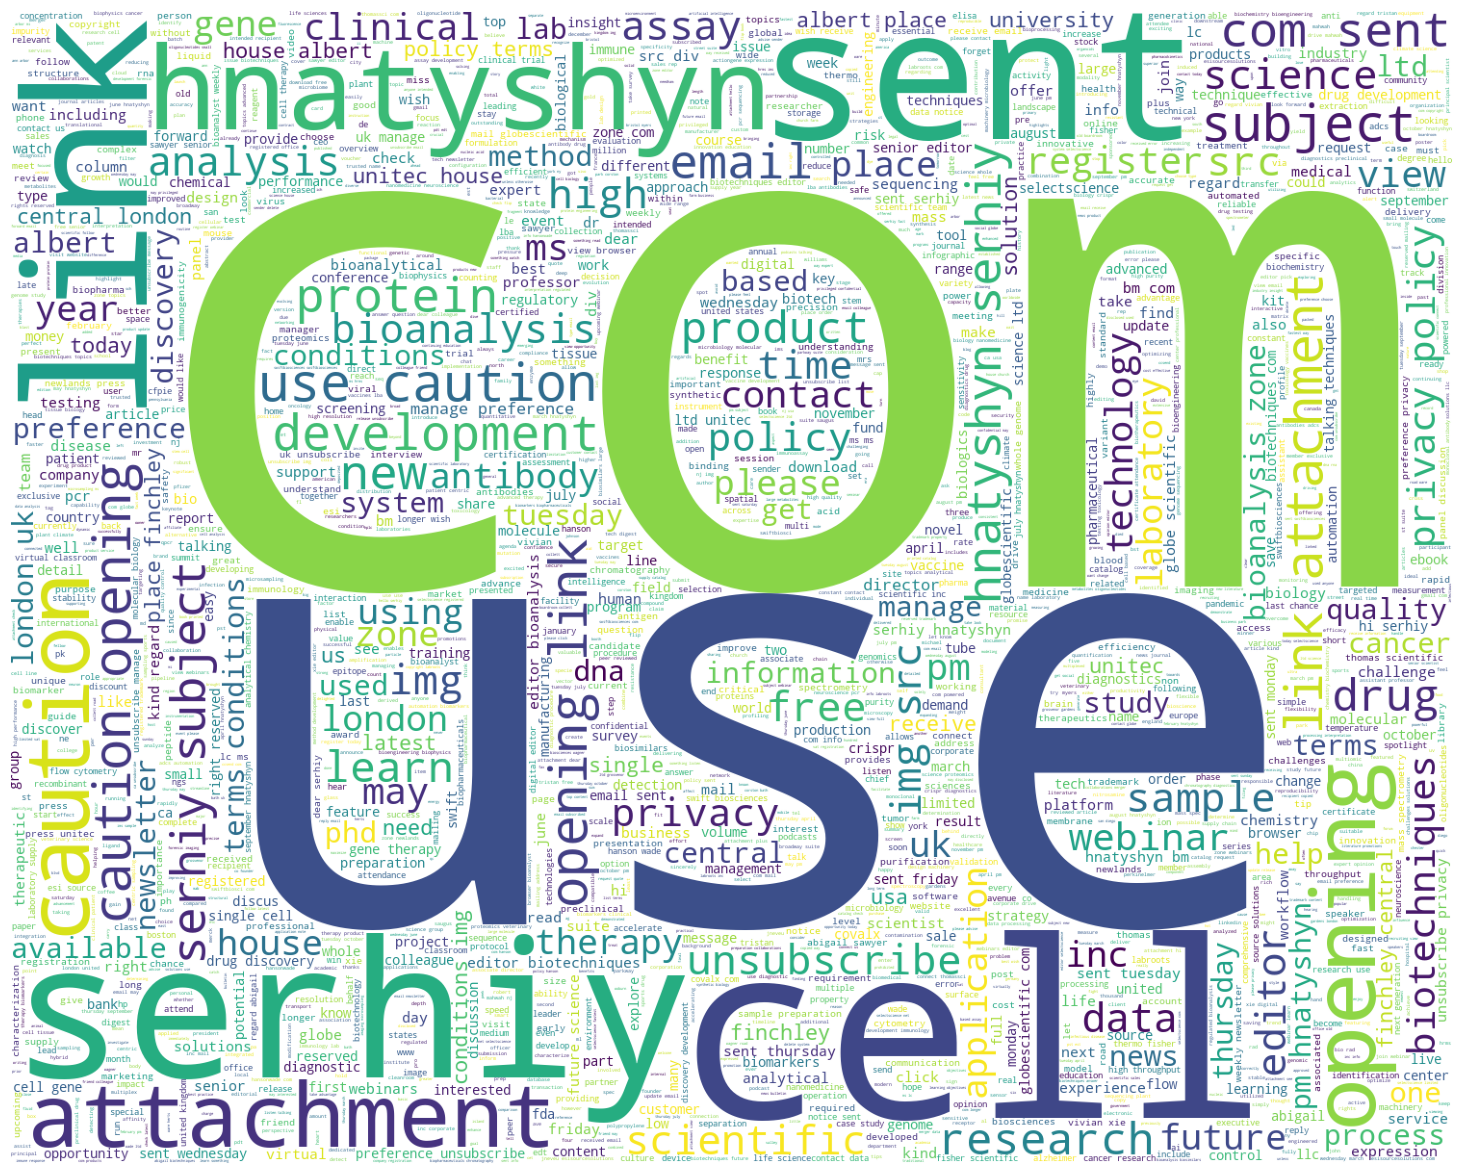

In [33]:
plt.figure(figsize=(20,15))
plt.imshow(ub)
plt.axis('off')

In [34]:
# Principal Component Analysis to consider 95% of data
ub_pca = PCA(n_components=500).fit_transform(ub_vz.toarray())

In [35]:
ub_pca.shape

(1092, 500)

In [36]:
# Clustering using Kmeans
kmeans = KMeans(n_clusters=10).fit(ub_pca)

In [37]:
ub_transformed=kmeans.transform(ub_pca)

In [38]:
ubl = kmeans.predict(ub_pca)

In [39]:
ubl

array([0, 3, 1, ..., 1, 1, 1])

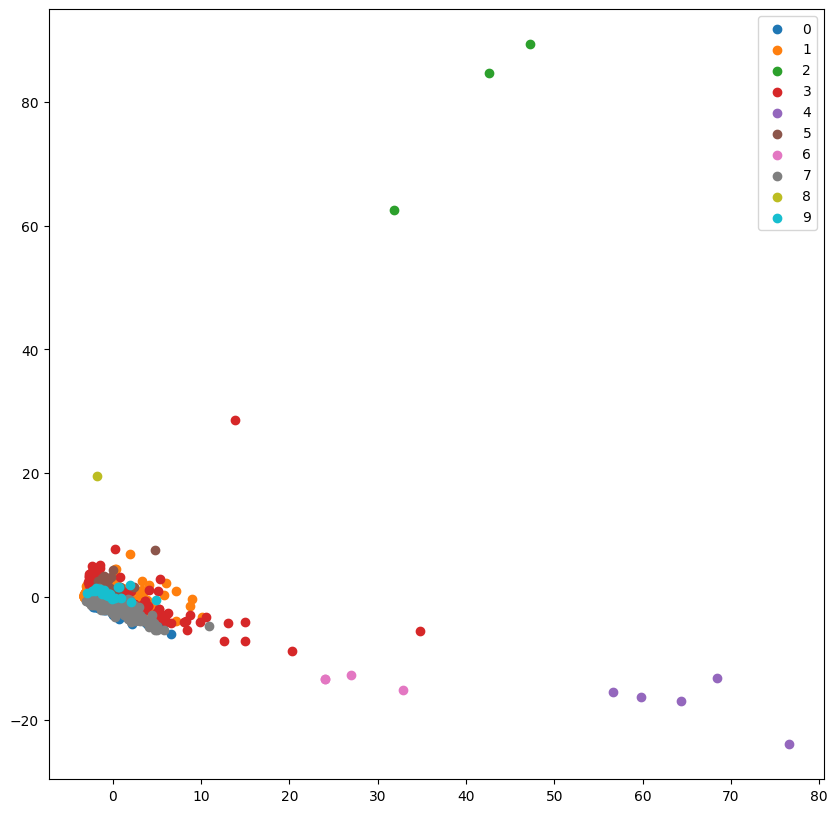

In [40]:
#--
ub_labels = np.unique(ubl)
plt.figure(figsize=(10,10))
    
d=[plt.scatter(ub_pca[ubl == x , 0] , ub_pca[ubl == x , 1] , label = x) for x in ub_labels]
plt.legend()
plt.show()

In [41]:
#--
clusters = []
for x in range(10):
    clusters.append("cluster "+str(x))
doc_indexs = []
for x in range(txt.shape[0]):
    doc_indexs.append("doc "+str(x))
    
tab_data = pd.DataFrame(np.round(ub_transformed,2) , index = doc_indexs, columns = clusters)
tab_data['cluster'] = np.argmax(tab_data.values,axis=1)
tab_data['cluster']='cluster ' + tab_data['cluster'].astype(str)
tab_data

cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  \
doc 0         17.92      20.33      93.99      22.29      76.41      25.76   
doc 1         31.37      29.98      96.12      26.34      73.98      34.08   
doc 2         20.12      18.16      93.53      20.42      75.78      24.38   
doc 3         14.01       9.29      92.31      13.77      75.07      18.18   
doc 4         25.44      23.15      94.77      20.68      76.47      27.71   
...             ...        ...        ...        ...        ...        ...   
doc 1087      22.45      22.87      94.06      23.78      74.15      27.95   
doc 1088      17.38      13.68      92.36      16.53      75.35      19.96   
doc 1089      31.71      29.84      89.85      31.27      78.97      31.41   
doc 1090      12.96       7.01      92.77      12.49      75.55      17.16   
doc 1091      13.44       8.57      92.77      13.54      75.35      18.07   

          cluster 6  cluster 7  cluster 8  cluster 9    cluster  
doc 0         54.73      20.59     129.64      24.96  cluster 8  
doc 1         56.21      31.36     129.36      32.37  cluster 8  
doc 2         55.46      21.05     128.43      22.73  cluster 8  
doc 3         54.29      14.30     126.36      16.65  cluster 8  
doc 4         54.81      24.90     127.94      26.60  cluster 8  
...             ...        ...        ...        ...        ...  
doc 1087      50.42      21.05     128.09      27.74  cluster 8  
doc 1088      54.48      17.36     127.81      19.13  cluster 8  
doc 1089      59.89      31.73     131.56      33.43  cluster 8  
doc 1090      53.93      13.11     127.12      16.51  cluster 8  
doc 1091      54.33      13.78     128.27      15.84  cluster 8  

[1092 rows x 11 columns]

In [42]:
ub_clusters=tab_data['cluster'].values.tolist()

In [43]:
tab_data['cluster'].value_counts()

cluster 8    1091
cluster 2       1
Name: cluster, dtype: int64

In [44]:
# Topic Modelling --
matrix_token_counts = CountVectorizer(min_df=20, max_features=5000,ngram_range=(1,2)) 

ub = matrix_token_counts.fit_transform(txt)
lda_model = LatentDirichletAllocation(n_components=10)             
X_topics = lda_model.fit_transform(ub)
topic_summaries_data = []
topic_word = lda_model.components_ 
vocab = matrix_token_counts.get_feature_names()

def topic_words_summeries(x,_topic):
    topic_words = np.array(vocab)[np.argsort(_topic)][:-(10+1):-1]
    topic_summaries_data.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

dat=[topic_words_summeries(x, _topic) for x, _topic in enumerate(topic_word)]



Topic 9: cell protein phd university professor development antibody research scientist expression
Topic 9: use sent please attachment link opening link attachment opening link caution opening use caution
Topic 9: protein cell assay analysis com mass use covalx sample high
Topic 9: serhiy email com hnatyshyn sent use new learn link serhiy subject
Topic 9: use com column product solutions sent sample serhiy high opening
Topic 9: ms selectscience drug development may webinar biomarkers therapy editor cell
Topic 9: serhiy com hnatyshyn sent email virtual drug course receive register
Topic 9: bioanalysis zone bioanalysis zone development editor serhiy editor bioanalysis clinical assay laboratory
Topic 9: biotechniques cell science editor editor biotechniques news future research cancer future science
Topic 9: com scientific globe globe scientific mail globescientific globescientific com mail globescientific tube laboratory


In [45]:
#--
topic_columns=[]
for x in range(lda_model.n_components):
    topic_columns.append("topic "+str(x))


doc_indexs = []
for x in range(txt.shape[0]):
    doc_indexs.append("doc "+str(x))

ub_document_topic = pd.DataFrame(np.round(X_topics, 2), columns=topic_columns, index=doc_indexs)
topic = np.argmax(ub_document_topic.values, axis=1)
ub_document_topic['topic'] = topic
ub_document_topic.head(10)

topic 0  topic 1  topic 2  topic 3  topic 4  topic 5  topic 6  topic 7  \
doc 0     0.00     0.00     0.00     0.00     0.00      0.0      0.0     0.00   
doc 1     0.00     0.00     1.00     0.00     0.00      0.0      0.0     0.00   
doc 2     0.07     0.00     0.29     0.16     0.48      0.0      0.0     0.00   
doc 3     0.00     0.27     0.00     0.69     0.03      0.0      0.0     0.00   
doc 4     0.00     0.00     1.00     0.00     0.00      0.0      0.0     0.00   
doc 5     0.03     0.05     0.04     0.00     0.00      0.0      0.0     0.88   
doc 6     0.00     0.00     0.00     0.92     0.00      0.0      0.0     0.00   
doc 7     0.00     0.98     0.00     0.00     0.01      0.0      0.0     0.00   
doc 8     0.00     0.00     0.00     0.00     0.00      0.0      0.0     0.00   
doc 9     0.18     0.00     0.00     0.81     0.00      0.0      0.0     0.00   

       topic 8  topic 9  topic  
doc 0      1.0     0.00      8  
doc 1      0.0     0.00      2  
doc 2      0.0     0.00      4  
doc 3      0.0     0.00      3  
doc 4      0.0     0.00      2  
doc 5      0.0     0.00      7  
doc 6      0.0     0.07      3  
doc 7      0.0     0.00      1  
doc 8      0.0     1.00      9  
doc 9      0.0     0.00      3

In [46]:
ub_document_topic['Cluster']=ub_clusters

In [47]:
ub_document_topic.to_csv('Uni-Bigrams.csv')

In [48]:
# TF-IDF Vectorization
tfidf=TfidfVectorizer(ngram_range=(1,2), min_df=20)
tfidf_transform=tfidf.fit_transform(txt)

In [49]:
tfidf_transform

<1092x2201 sparse matrix of type '<class 'numpy.float64'>'
	with 148181 stored elements in Compressed Sparse Row format>

In [50]:
tfidf.vocabulary_.items()

dict_items([('crispr', 479), ('show', 1764), ('abigail', 0), ('biotechniques', 213), ('editor', 610), ('com', 377), ('sent', 1727), ('friday', 784), ('april', 95), ('pm', 1418), ('hnatyshyn', 884), ('serhiy', 1749), ('subject', 1853), ('use', 2065), ('caution', 278), ('opening', 1320), ('link', 1088), ('attachment', 121), ('different', 559), ('aspect', 108), ('medicine', 1178), ('accurate', 14), ('gene', 801), ('editing', 608), ('therapeutic', 1934), ('application', 87), ('brain', 236), ('tech', 1915), ('newsletter', 1276), ('peek', 1371), ('behind', 164), ('paper', 1349), ('screen', 1698), ('imaging', 916), ('regulatory', 1592), ('factor', 712), ('work', 2176), ('author', 139), ('developed', 541), ('easy', 605), ('workflow', 2177), ('combine', 392), ('high', 869), ('content', 442), ('technology', 1922), ('image', 915), ('based', 155), ('approach', 92), ('bringing', 239), ('dna', 582), ('put', 1525), ('enzyme', 656), ('help', 861), ('virus', 2112), ('making', 1140), ('life', 1078), ('s

In [51]:
tfidf_weights = [(word, tfidf_transform.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]

In [52]:
tf_idf = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))

(-0.5, 1499.5, 1199.5, -0.5)

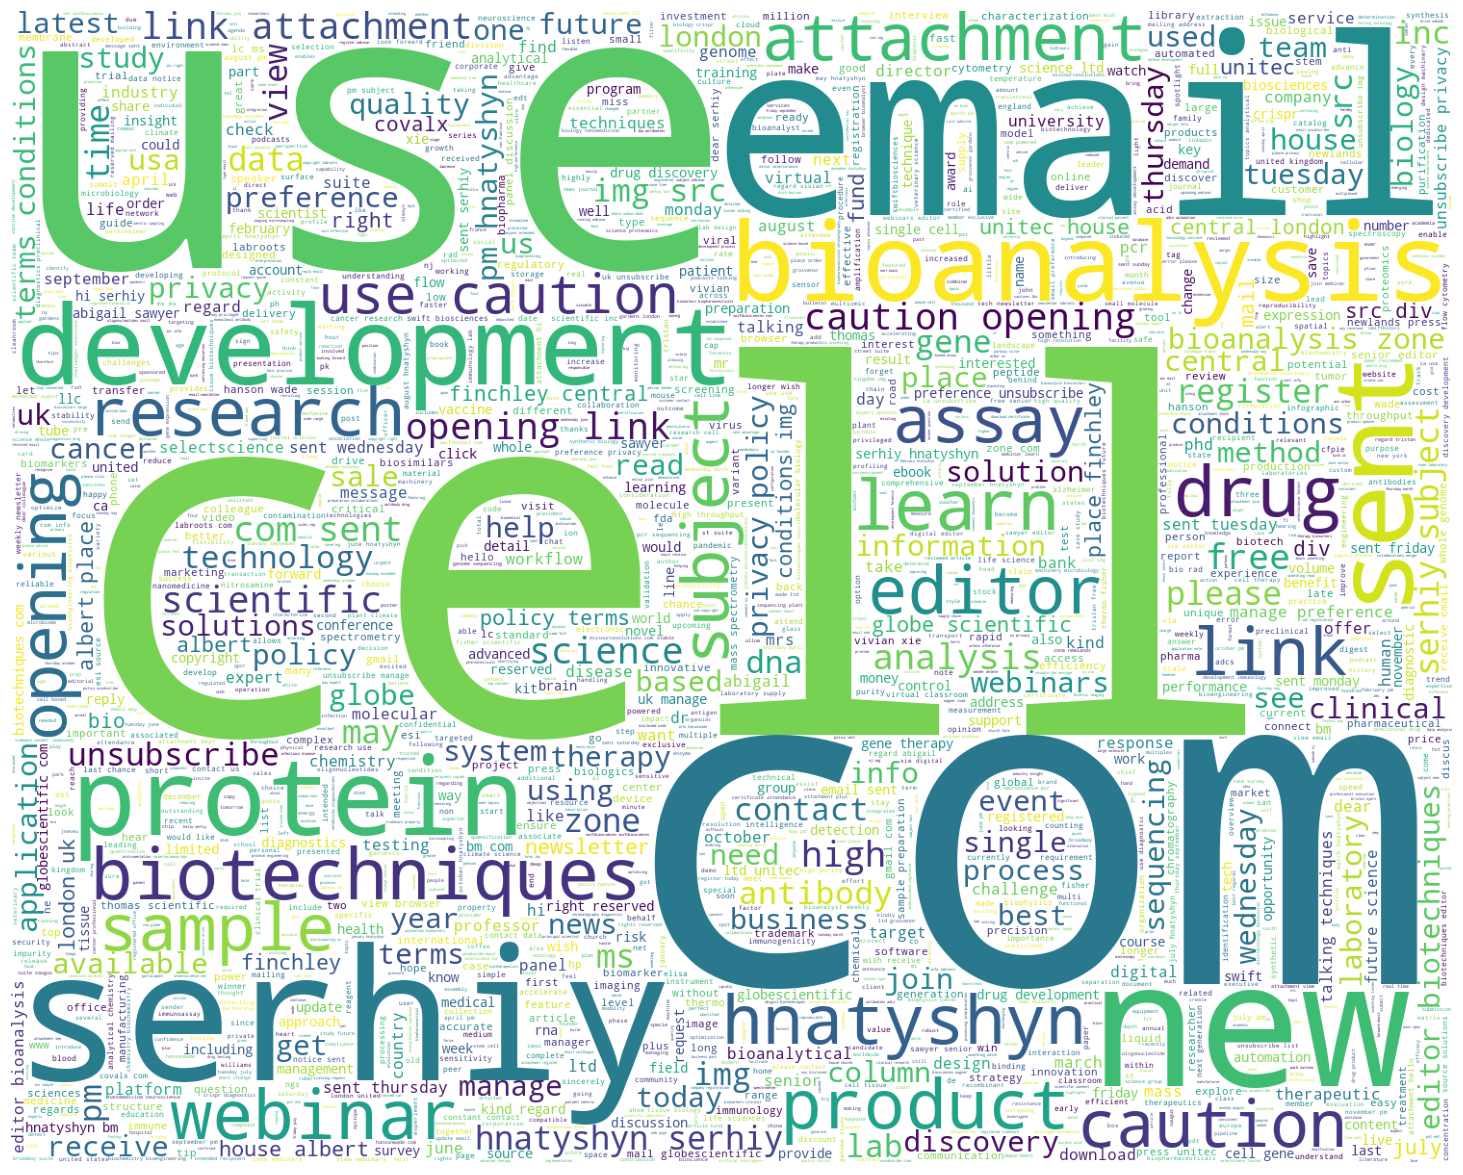

In [53]:
plt.figure(figsize=(20,15))
plt.imshow(tf_idf)
plt.axis('off')

In [54]:
#Component Analysis--
tfidf_pca = PCA(n_components=500).fit_transform(tfidf_transform.toarray())

In [55]:
tfidf_pca.shape

(1092, 500)

In [56]:
kmeans = KMeans(n_clusters=10).fit(tfidf_pca)

In [57]:
tfidf_trans = kmeans.transform(tfidf_pca)

In [58]:
tfidf_label = kmeans.predict(tfidf_pca)

In [59]:
tfidf_label.shape

(1092,)

In [60]:
np.unique(tfidf_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 21,  43,  26, 101,  37, 146,  53,  98,  35, 532], dtype=int64))

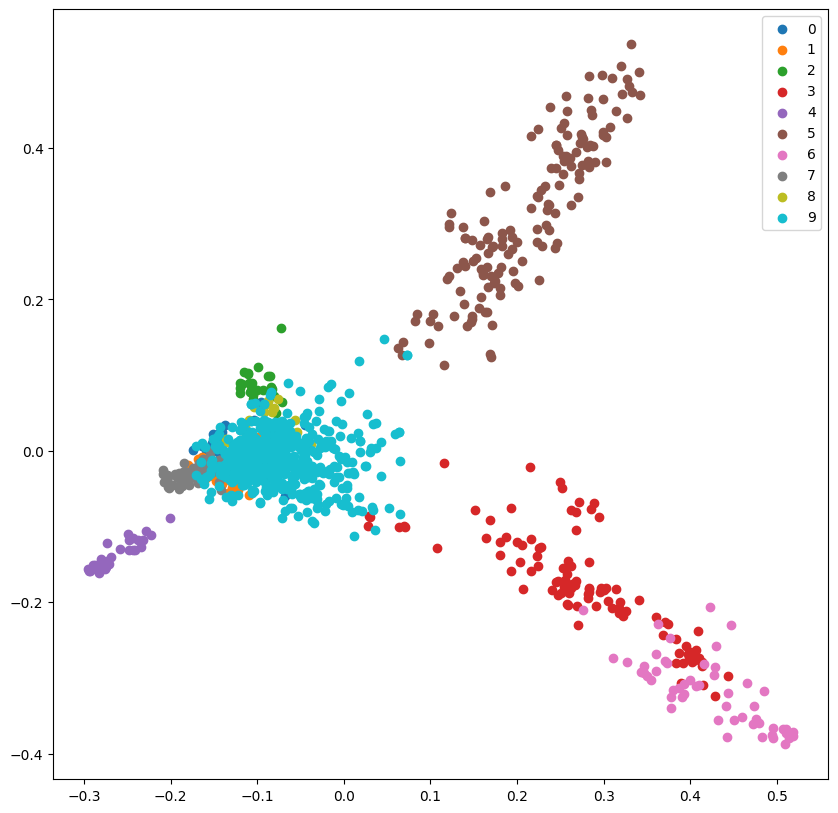

In [61]:
u_labels = np.unique(tfidf_label)

plt.figure(figsize=(10,10))

for i in u_labels:
    plt.scatter(tfidf_pca[tfidf_label == i , 0] , tfidf_pca[tfidf_label == i , 1] , label = i)
    
plt.legend()

plt.show()

In [62]:
#--
clusters = []
for x in range(10):
    clusters.append("cluster "+str(x))
doc_indexs = []
for x in range(txt.shape[0]):
    doc_indexs.append("doc "+str(x))

tfidfdf = pd.DataFrame(np.round(tfidf_trans,2) ,columns = clusters, index = doc_indexs)
tfidfdf['Cluster'] = np.argmax(tfidfdf.values,axis=1)
tfidfdf['Cluster']='Cluster ' + tfidfdf['Cluster'].astype(str)
tfidfdf

cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  \
doc 0          1.24       1.11       1.26       0.87       1.24       1.00   
doc 1          1.26       1.11       1.27       1.07       1.25       1.05   
doc 2          1.24       1.07       1.25       1.00       1.22       1.03   
doc 3          1.23       1.07       1.24       1.06       1.23       1.06   
doc 4          1.24       1.11       1.27       1.08       1.24       1.05   
...             ...        ...        ...        ...        ...        ...   
doc 1087       1.25       1.11       1.26       1.00       1.24       0.92   
doc 1088       1.21       1.07       1.24       1.05       1.21       1.05   
doc 1089       1.14       1.09       1.24       1.05       1.22       1.04   
doc 1090       1.23       1.11       1.26       1.07       1.21       1.06   
doc 1091       1.24       0.81       1.26       1.05       1.21       1.05   

          cluster 6  cluster 7  cluster 8  cluster 9    Cluster  
doc 0          1.00       1.03       1.12       0.96  Cluster 2  
doc 1          1.17       1.05       1.15       0.93  Cluster 2  
doc 2          1.12       1.01       1.12       0.91  Cluster 2  
doc 3          1.16       0.99       1.09       0.94  Cluster 2  
doc 4          1.19       1.04       1.14       0.94  Cluster 2  
...             ...        ...        ...        ...        ...  
doc 1087       1.10       1.05       1.13       0.94  Cluster 2  
doc 1088       1.17       1.02       1.10       0.93  Cluster 2  
doc 1089       1.16       1.01       1.07       0.93  Cluster 2  
doc 1090       1.18       0.90       1.12       0.95  Cluster 2  
doc 1091       1.16       1.00       1.11       0.94  Cluster 2  

[1092 rows x 11 columns]

In [63]:
tfidfdf['Cluster'].value_counts()

Cluster 2    885
Cluster 0    149
Cluster 4     58
Name: Cluster, dtype: int64

In [64]:
tfidf_clusters=tfidfdf['Cluster'].values.tolist()

In [65]:
# Modelling topic with LDA
matrix_tfidf = TfidfVectorizer(min_df=20, ngram_range=(1,2)) 

tfidf = matrix_tfidf.fit_transform(txt)
lda_model = LatentDirichletAllocation(n_components=10)             
X_topics = lda_model.fit_transform(tfidf)

topic_summaries_data = []
topic_word = lda_model.components_ 
vocab = matrix_tfidf.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(10+1):-1]
    topic_summaries_data.append(' '.join(topic_words))
    print(f"topic {i}: {' '.join(topic_words)}")

topic 0: abigail swift sawyer abigail sawyer dna talking techniques issue talking sawyer senior sequencing
topic 1: fl constant learn something bee something listen serhiy fact something read fact week something watch biotechniques answer take survey
topic 2: thomas thomas scientific ne hp scientific thermo thermo fisher high purity fisher scientific fisher
topic 3: course virtual classroom virtual classroom cfpie training center professional professional innovation innovation education fda
topic 4: com email use sent serhiy new hnatyshyn link please inc
topic 5: selectscience intended net may registered recipient webinar intended recipient price registration
topic 6: cell bioanalysis biotechniques editor zone development bioanalysis zone drug science assay
topic 7: development cell pathway assessment lawrence explores expect delighted fact increasing offering
topic 8: development cell pathway assessment lawrence explores expect delighted fact increasing offering
topic 9: protein colum

In [66]:
#--
topics = []
for x in range(lda_model.n_components):
    topics.append("topic "+str(x))
doc_indexs = []
for x in range(txt.shape[0]):
    doc_indexs.append("doc "+str(x))

tfidf_document_topic = pd.DataFrame(np.round(X_topics, 2), columns=topics, index=doc_indexs)
topic = np.argmax(tfidf_document_topic.values, axis=1)
tfidf_document_topic['topic'] = topic
tfidf_document_topic.head(10)

topic 0  topic 1  topic 2  topic 3  topic 4  topic 5  topic 6  topic 7  \
doc 0     0.09     0.01     0.01     0.01     0.03     0.01     0.79     0.01   
doc 1     0.01     0.01     0.01     0.01     0.01     0.01     0.01     0.01   
doc 2     0.22     0.01     0.01     0.01     0.61     0.01     0.01     0.01   
doc 3     0.01     0.01     0.01     0.01     0.80     0.04     0.01     0.01   
doc 4     0.01     0.01     0.01     0.01     0.01     0.01     0.01     0.01   
doc 5     0.01     0.01     0.01     0.01     0.01     0.01     0.90     0.01   
doc 6     0.01     0.01     0.11     0.01     0.60     0.01     0.01     0.01   
doc 7     0.01     0.01     0.01     0.01     0.89     0.01     0.01     0.01   
doc 8     0.01     0.01     0.01     0.01     0.90     0.01     0.01     0.01   
doc 9     0.01     0.01     0.01     0.01     0.34     0.01     0.01     0.01   

       topic 8  topic 9  topic  
doc 0     0.01     0.03      6  
doc 1     0.01     0.91      9  
doc 2     0.01     0.11      4  
doc 3     0.01     0.09      4  
doc 4     0.01     0.92      9  
doc 5     0.01     0.01      6  
doc 6     0.01     0.22      4  
doc 7     0.01     0.01      4  
doc 8     0.01     0.01      4  
doc 9     0.01     0.56      9

In [67]:
tfidf_document_topic['Cluster']=tfidf_clusters

In [68]:
tfidf_document_topic.to_csv('tfidf.csv')

In [69]:
# vector representation
def sen_vec(sentence,model):
    temp = np.zeros((len(sentence),1000),dtype=float)
    for i,j in enumerate(sentence):
        if j in model.wv.key_to_index.keys():
            temp[i,:] = model.wv.get_vector(j)
    return np.sum(temp,axis=0)/len(sentence)


In [70]:
w2v = gensim.models.Word2Vec(txt, min_count= 10, vector_size= 1000, window=10)

In [71]:
vecs = np.array([sen_vec(x,w2v) for x in txt])

In [72]:
# Principal Component Analysis
w2v_pca = PCA(n_components=500).fit_transform(vecs)

In [73]:
w2v_pca.shape

(1092, 500)

In [74]:
# Kmeans clustering
kmeans = KMeans(n_clusters=10).fit(w2v_pca)

In [75]:
w2v_trans=kmeans.transform(w2v_pca)

In [76]:
w2v_label = kmeans.predict(w2v_pca)

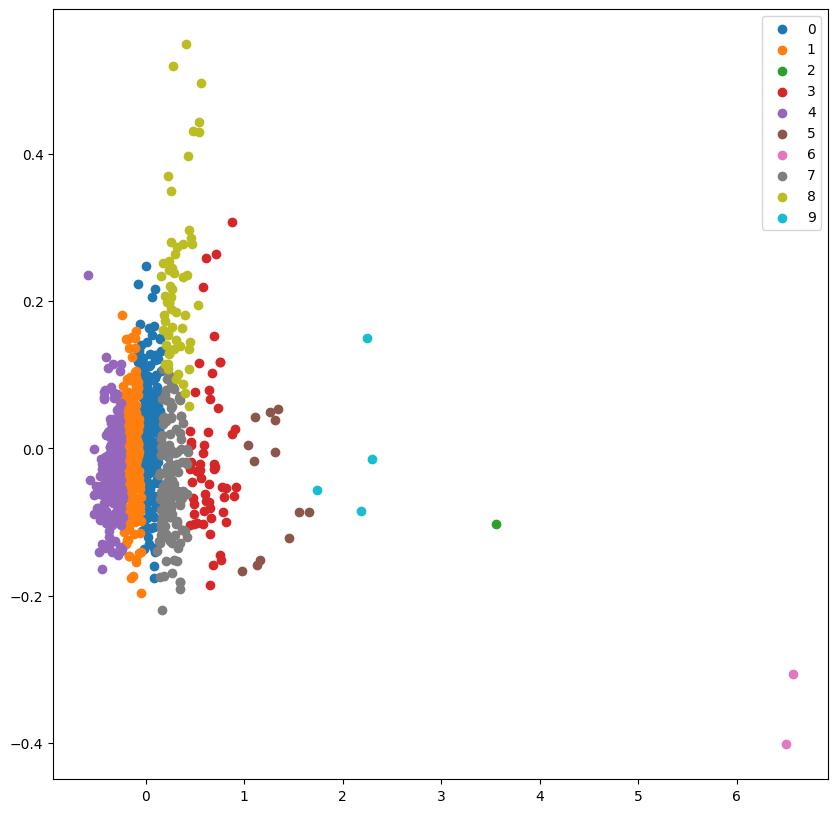

In [77]:
u_labels = np.unique(w2v_label)
plt.figure(figsize=(10,10))
for x in u_labels:
    plt.scatter(w2v_pca[w2v_label == x , 0] , w2v_pca[w2v_label == x , 1] , label = x)
plt.legend()
plt.show()

In [78]:
#--
clusters = []
for x in range(10):
    clusters.append("cluster "+str(x))
doc_indexs = []
for x in range(txt.shape[0]):
    doc_indexs.append("doc "+str(x))

w2v_df = pd.DataFrame(np.round(w2v_trans,2) ,columns = clusters, index = doc_indexs)
w2v_df['Cluster'] = np.argmax(w2v_df.values,axis=1)
w2v_df['Cluster']='Cluster ' + w2v_df['Cluster'].astype(str)
w2v_df

cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  \
doc 0          0.23       0.38       3.39       0.47       0.54       1.08   
doc 1          0.16       0.28       3.52       0.60       0.44       1.22   
doc 2          0.19       0.20       3.62       0.70       0.33       1.31   
doc 3          0.18       0.15       3.66       0.74       0.28       1.36   
doc 4          0.22       0.13       3.72       0.79       0.23       1.41   
...             ...        ...        ...        ...        ...        ...   
doc 1087       0.25       0.11       3.78       0.85       0.17       1.48   
doc 1088       0.16       0.14       3.66       0.73       0.29       1.35   
doc 1089       0.20       0.29       3.49       0.57       0.45       1.19   
doc 1090       0.72       0.89       2.88       0.26       1.06       0.62   
doc 1091       0.53       0.70       3.14       0.38       0.87       0.89   

          cluster 6  cluster 7  cluster 8  cluster 9    Cluster  
doc 0          6.36       0.14       0.36       1.94  Cluster 6  
doc 1          6.50       0.26       0.34       2.07  Cluster 6  
doc 2          6.59       0.32       0.50       2.17  Cluster 6  
doc 3          6.64       0.37       0.48       2.21  Cluster 6  
doc 4          6.70       0.42       0.55       2.27  Cluster 6  
...             ...        ...        ...        ...        ...  
doc 1087       6.76       0.48       0.57       2.33  Cluster 6  
doc 1088       6.63       0.35       0.47       2.20  Cluster 6  
doc 1089       6.47       0.22       0.44       2.04  Cluster 6  
doc 1090       5.85       0.52       0.53       1.44  Cluster 6  
doc 1091       6.12       0.42       0.22       1.70  Cluster 6  

[1092 rows x 11 columns]